**✅ 1. إعداد البيئة وتحميل البيانات (Data Preprocessing)**

In [7]:
import pandas as pd  # للتعامل مع الجداول (DataFrames)
import numpy as np  # للتعامل مع الأرقام والمصفوفات
import matplotlib.pyplot as plt  # لرسم الرسوم البيانية
import seaborn as sns  # لتحسين شكل الرسوم
import matplotlib


from sklearn.preprocessing import StandardScaler  # لتوحيد القيم
from sklearn.decomposition import PCA  # لتقليل الأبعاد
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering  # خوارزميات التجميع
from sklearn.metrics import silhouette_score  # لقياس جودة العناقيد
from scipy.cluster.hierarchy import dendrogram, linkage  # للرسم الشجري Hierarchical

import warnings
warnings.filterwarnings("ignore")  # لإخفاء رسائل التحذير


In [8]:
# قراءة البيانات
df = pd.read_csv("/content/CC GENERAL.csv")



# عرض أول 5 صفوف
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.info() #  عرض معلومات الاعمدة
# نوع البيانات و عدد الاعمدة غير الفارغة

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.isnull().sum() # اظهار الاعمدة التي تحتوي بيانات مفقودة


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [11]:
# cleaning
df_cleaned = df.dropna() #  حذف الاعمدة التي تحتوي قيم مفقودة


df_cleaned.reset_index(drop=True, inplace=True) #  ترتيب الفهرسة بعد حذف الصفوف.

print("📦 عدد الصفوف والأعمدة بعد التنظيف:")
df_cleaned.shape





📦 عدد الصفوف والأعمدة بعد التنظيف:


(8636, 18)

In [12]:
print("🔹 إحصائيات عامة:")
display(df.describe())


🔹 إحصائيات عامة:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


يظهر لنا
 المتوسط الحسابي

الانحراف المعياري

القيمة الصغرى والعظمى

النسبة الربعية (25% و50% و75%)

يساعدنا في معرفة ما إذا كانت هناك أعمدة تحتوي على قيم شاذة (مثل عملاء لديهم مشتريات بقيمة 20,000 بينما البقية أقل بكثير).

In [13]:
print("\n🔹 عدد القيم المفقودة:")
display(df.isnull().sum()) # اظهار الاعمدة التي تحتوي قيم مفقودة




🔹 عدد القيم المفقودة:


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


هذا الكود يظهر لك الأعمدة التي تحتوي على قيم مفقودة (NaN)، حتى نقرر لاحقًا هل نحذفها أو نعوّضها.

✅ المرحلة الثانية: التحليل الاستكشافي للبيانات (EDA)

In [14]:
df_cleaned = df_cleaned.drop('CUST_ID', axis=1) # حذفنا عامود custmoer id
print(df_cleaned.columns)


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [15]:
matplotlib.rcParams['font.family'] = 'DejaVu Sans' # اعدة الخط الى الافتراضي


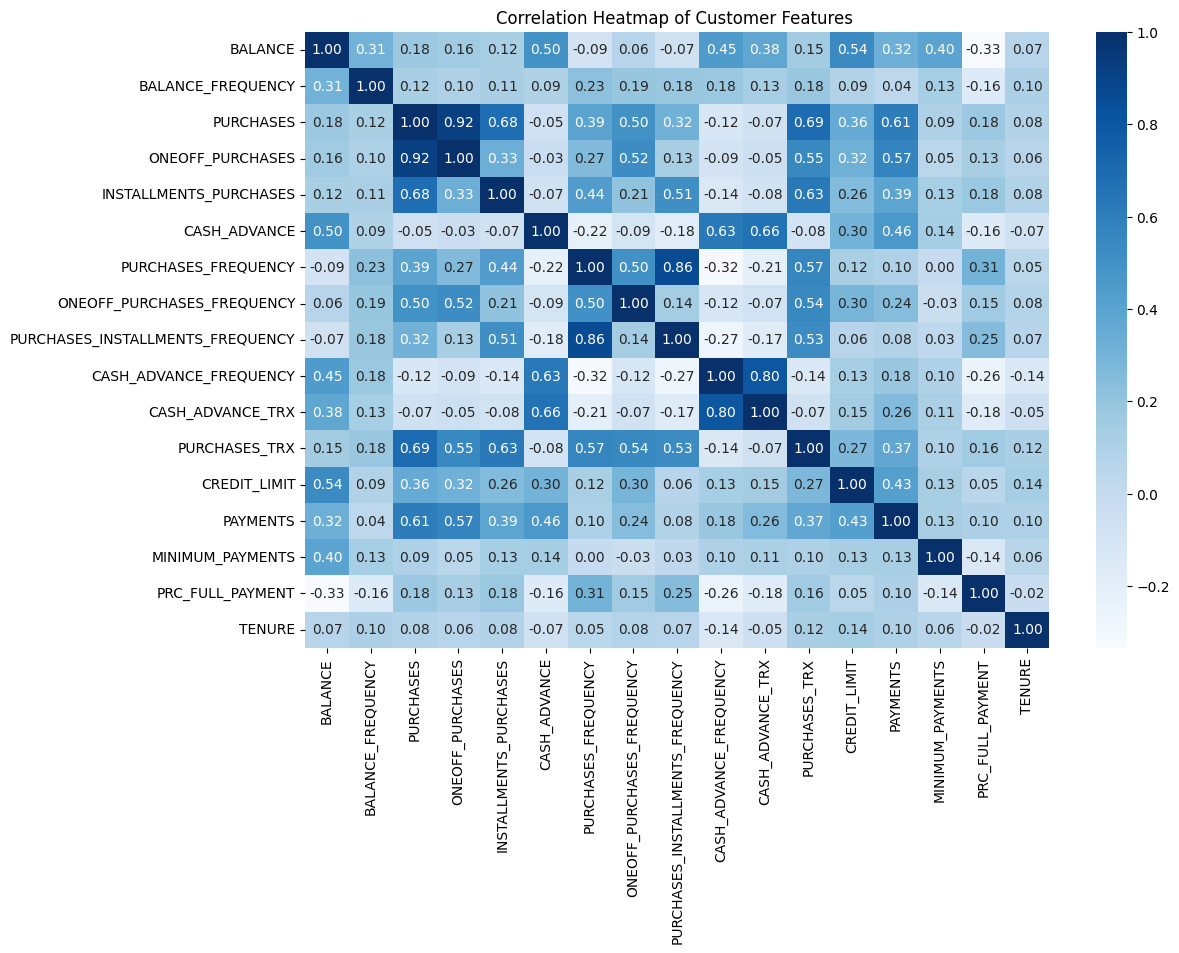

In [16]:
# رسم خريطة الارتباط (Heatmap) بين المتغيرات
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='Blues', fmt=".2f") #يعرض مصفوفة ارتباط بين المتغيرات ويكشف لنا المتغيرات التي تتحرك معًا
plt.title("Correlation Heatmap of Customer Features ")
plt.show()

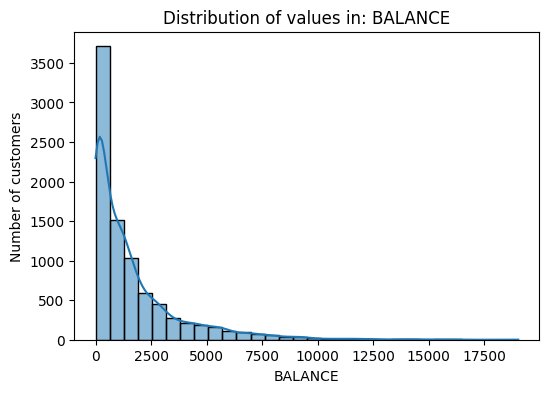

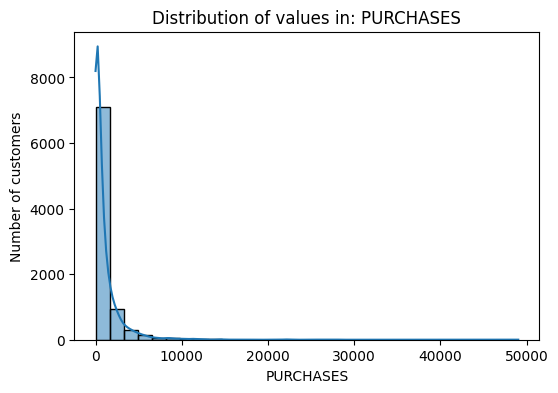

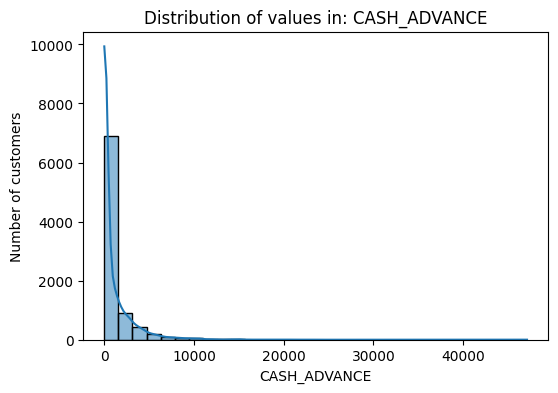

In [17]:

# Select some key columns for distribution analysis
cols_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f"Distribution of values in: {col}")
    plt.xlabel(col)
    plt.ylabel("Number of customers")
    plt.show()


✅ المرحلة 3: تقييس البيانات + تقليل الأبعاد (PCA) + التجميع (Clustering)


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Scale the data
scaler = StandardScaler() # توحيد القيم لجعلها بنفس النطاق – مهم جدًا للتجميع
scaled_data = scaler.fit_transform(df_cleaned)

# Step 2: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2) # تقليل عدد الأعمدة إلى 2 فقط لتسهيل الرسم والتحليل
reduced_data = pca.fit_transform(scaled_data)

# Step 3: Convert to DataFrame for easier plotting
df_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2']) # تحويل الناتج إلى جدول من نوع DataFrame لتسهيل العمل عليه

# Preview the result
df_pca.head()


,PC1,PC2
0,-1.696395,-1.122584
1,-1.215681,2.435638
2,0.935853,-0.385202
3,-1.614638,-0.724586
4,0.223701,-0.783610


✅ المرحلة 4: تطبيق خوارزميات Clustering (KMeans - DBSCAN - Hierarchical)

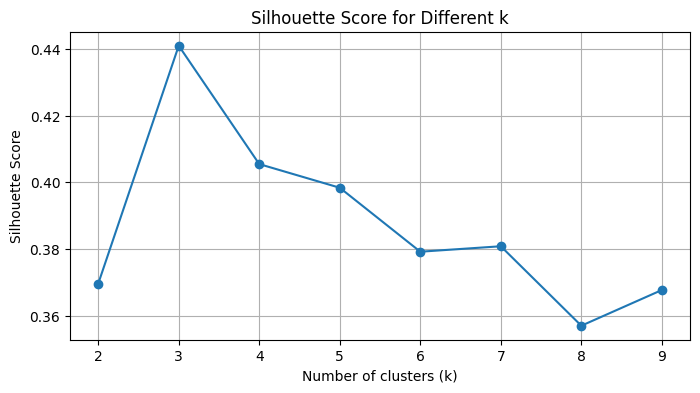

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Try multiple values for k to find the best number of clusters
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Step 2: Plot silhouette scores to find the optimal k
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

افضل عدد لل clusters
من الرسم هي 3


In [20]:
optimal_k = 3


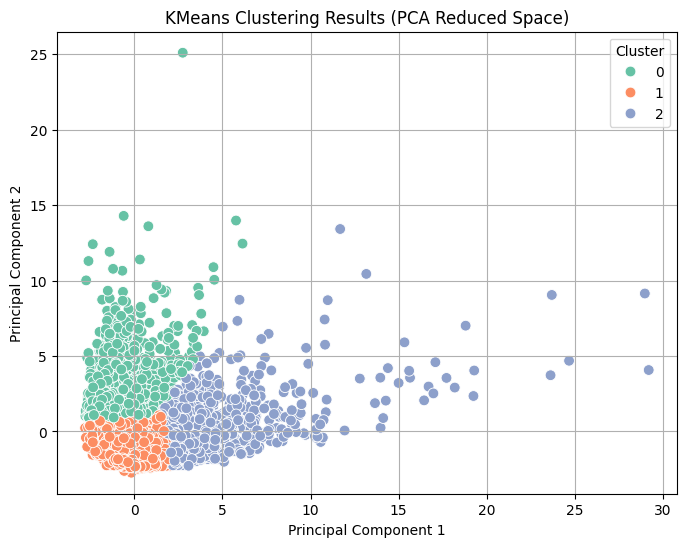

In [21]:
from sklearn.cluster import KMeans

# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Add cluster labels to PCA DataFrame
df_pca['Cluster'] = clusters

# Visualize the clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set2', s=60)
plt.title("KMeans Clustering Results (PCA Reduced Space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#
رسم Scatter Plot لعرض نتائج KMeans بعد تقليل الأبعاد باستخدام PCA



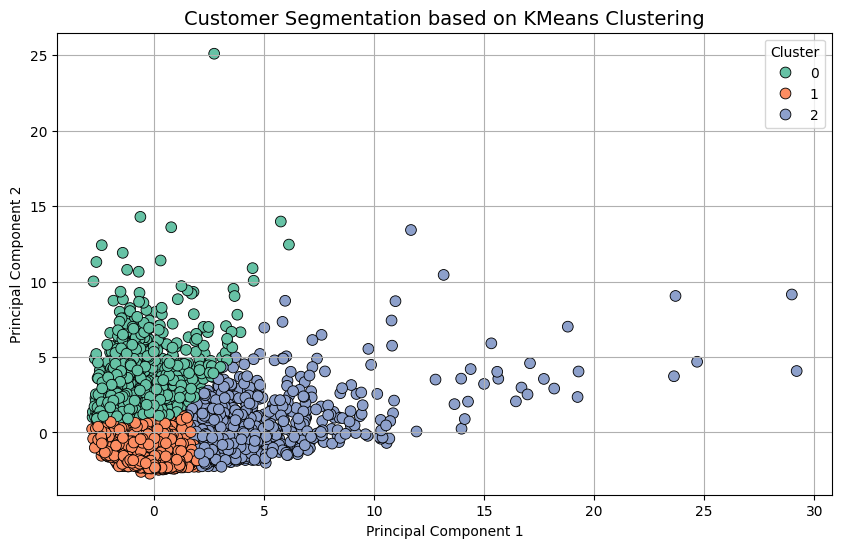

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم النقاط باستخدام مكونات PCA، وتلوينها حسب العنقود
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',       # اسم العمود الذي يحتوي على نتائج KMeans
    data=df_pca,         # الداتا فريم الناتج من PCA مع إضافة عمود "Cluster"
    palette='Set2',
    s=60,
    edgecolor='k'
)

plt.title("Customer Segmentation based on KMeans Clustering", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


✅ المرحلة 5: التجميع باستخدام DBSCAN

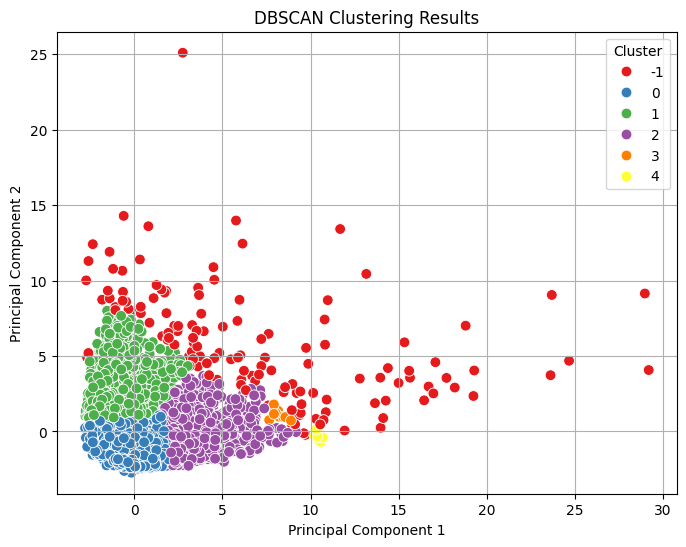

In [22]:
from sklearn.cluster import DBSCAN

# Step 1: Apply DBSCAN (you can tune eps and min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(df_pca)

# Step 2: Add labels to the dataframe
df_pca['DBSCAN_Cluster'] = db_labels

# Step 3: Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=df_pca, palette='Set1', s=60)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


DBSCAN(...)  >> يكتشف العناقيد ذات الكثافة العالية، ويصنّف النقاط الشاذة بـ -1

eps=0.5 >> نصف قطر البحث عن الجيران — يمكنك تغييره حسب كثافة البيانات

min_samples=5 >> أقل عدد نقاط ليتم اعتبارها عنقودًا

✅ المرحلة 6: Hierarchical Clustering (التجميع الهرمي)

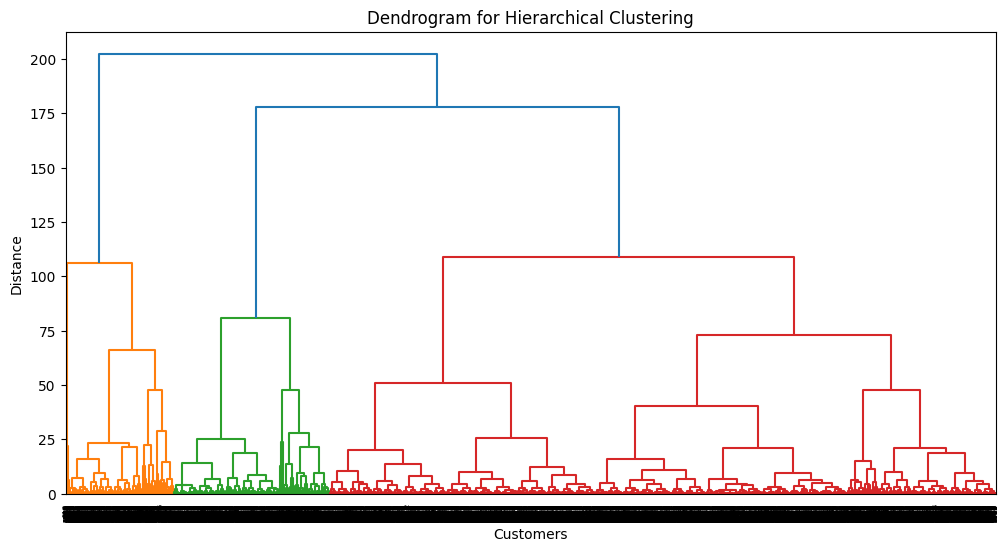

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Step 1: Dendrogram to visualize possible number of clusters
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(df_pca[['PC1', 'PC2']], method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


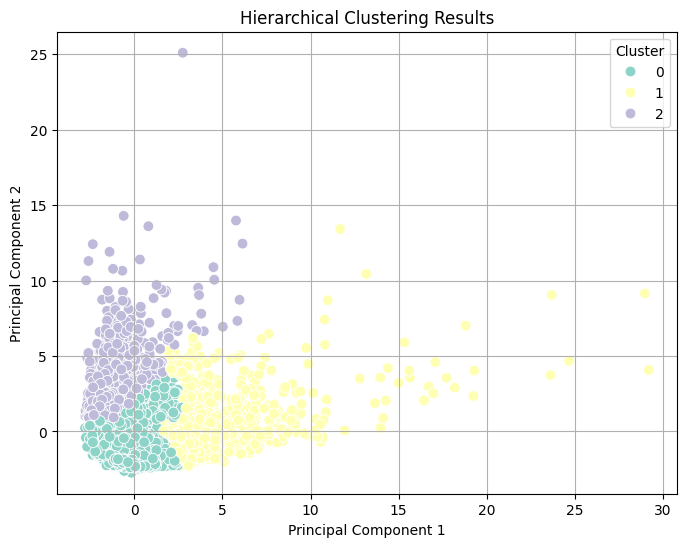

In [24]:
# Step 2: Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(df_pca[['PC1', 'PC2']])

# Step 3: Visualize the clusters
df_pca['HC_Cluster'] = hc_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HC_Cluster', data=df_pca, palette='Set3', s=60)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


✅ المرحلة 7: مقارنة أداء KMeans و DBSCAN و Hierarchical Clustering

In [25]:
from sklearn.metrics import silhouette_score

# 1. Silhouette score for KMeans
kmeans_score = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['Cluster']) # مقياس لجودة الفصل بين المجموعات (من 0 إلى 1 – كلما زاد كان أفضل)

# 2. Silhouette score for DBSCAN (نتجاهل النقاط -1 لأنها شاذة)
mask_dbscan = df_pca['DBSCAN_Cluster'] != -1 # نستثني النقاط المصنّفة -1 لأنها تعتبر outliers
if mask_dbscan.sum() > 1:
    dbscan_score = silhouette_score(df_pca[mask_dbscan][['PC1', 'PC2']], df_pca[mask_dbscan]['DBSCAN_Cluster'])
else:
    dbscan_score = "Not enough clusters"

# 3. Silhouette score for Hierarchical Clustering
hc_score = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['HC_Cluster'])

# 4. عرض النتائج
print("Silhouette Score Comparison:")
print(f"KMeans: {kmeans_score:.3f}")                 # مقارنة بين الثلاث طرق
print(f"DBSCAN: {dbscan_score}")
print(f"Hierarchical Clustering: {hc_score:.3f}")


Silhouette Score Comparison:
KMeans: 0.441
DBSCAN: 0.4171909678119634
Hierarchical Clustering: 0.428


المرحلة 8 : تفسير النتائج وتحليل كل Cluster

ربط كل مجموعة (Cluster) بسلوك العملاء الحقيقي مثل:

من هم العملاء الأكثر إنفاقًا؟

من يسحبون نقدًا بكثرة؟

من قليل التفاعل؟



In [26]:
## دمج نتائج التجميع مع البيانات الأصلية

# دمج نتائج العنقود مع البيانات الأصلية (قبل PCA)
df_final = df_cleaned.copy()
df_final['Cluster'] = df_pca['Cluster']  # نستخدم نتائج KMeans كمثال

# حساب المتوسط لكل عنقود
cluster_summary = df_final.groupby('Cluster').mean()
display(cluster_summary)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,3721.925049,0.955499,332.568151,218.249045,114.387357,3534.466345,0.203126,0.099381,0.120612,0.419065,11.346578,4.700883,6314.774400,2835.643586,1693.593472,0.031078,11.364238
1,781.823427,0.859135,562.163497,285.872519,276.633853,276.386817,0.500926,0.151923,0.370120,0.061415,1.058341,9.689083,3289.669331,932.153268,507.386479,0.172914,11.513712
2,2373.167303,0.982359,4581.116861,2904.314268,1677.348544,544.979322,0.953219,0.662778,0.771287,0.070432,1.819836,59.908098,7986.396724,4491.345975,1356.286193,0.299820,11.922657


| العنصر            | Cluster 0 | Cluster 1 | Cluster 2 |
| ----------------- | --------- | --------- | ---------- |
| **BALANCE**       | عالي      | منخفض     | متوسط     |
| **PURCHASES**     |منخفض      | متوسط     | عالي      |
| **CASH\_ADVANCE** | عالي      | منخفض     | متوسط     |


 المرحلة 9: رسومات مقارنة العناقيد

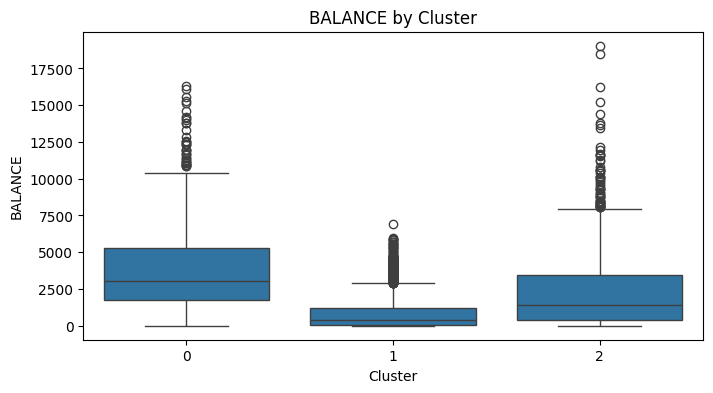

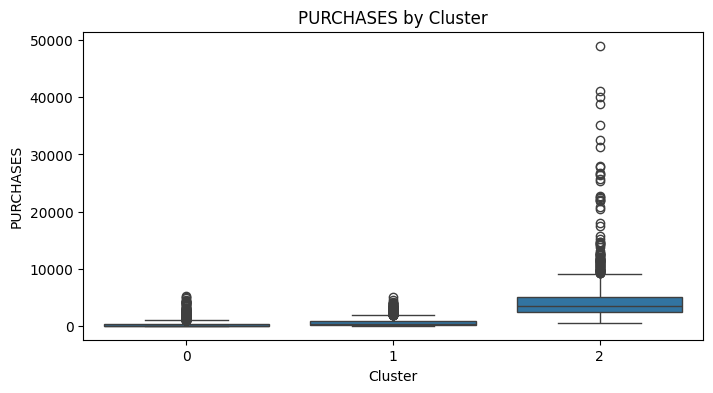

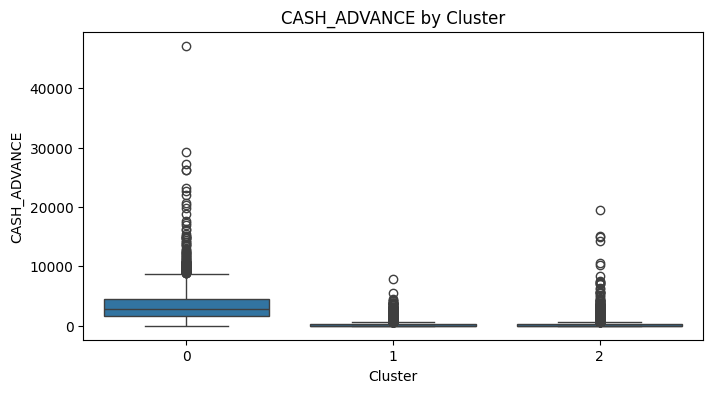

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=df_final)
    plt.title(f'{feature} by Cluster')
    plt.show()


المرحلة 10: التوصيات (Insights)

| العنقود   | التفسير السلوكي                         | التوصية                                             |
| --------- | --------------------------------------- | --------------------------------------------------- |
| Cluster 0 | رصيد عالي، مشتريات قليلة، سحب نقدي عالي | استهداف بعروض مشتريات وبرامج ولاء                   |
| Cluster 1 | رصيد منخفض، كل القيم منخفضة             | عملاء غير نشطين، يمكن تجاهلهم أو تنشيطهم            |
| Cluster 2 | رصيد متوسط، مشتريات عالية، سحب متوسط    | عملاء نشطين بالمشتريات، استهداف بعروض شراء بالتقسيط |
